In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)

AttributeError: partially initialized module 'numpy' has no attribute 'random' (most likely due to a circular import)

In [2]:
df = pd.read_csv('datasets_626341_1116242_wine-clustering.csv')
df.head()

NameError: name 'pd' is not defined

In [3]:
# check dataset shape
df.shape

NameError: name 'df' is not defined

In [4]:
# chekc data types
df.dtypes

NameError: name 'df' is not defined

In [5]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

NameError: name 'df' is not defined

In [6]:
# check for missing data
df.isna().sum()

NameError: name 'df' is not defined

In [7]:
# get descriptive statistics
df.describe()

NameError: name 'df' is not defined

C:\Users\Ramyasree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ramyasree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ramyasree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

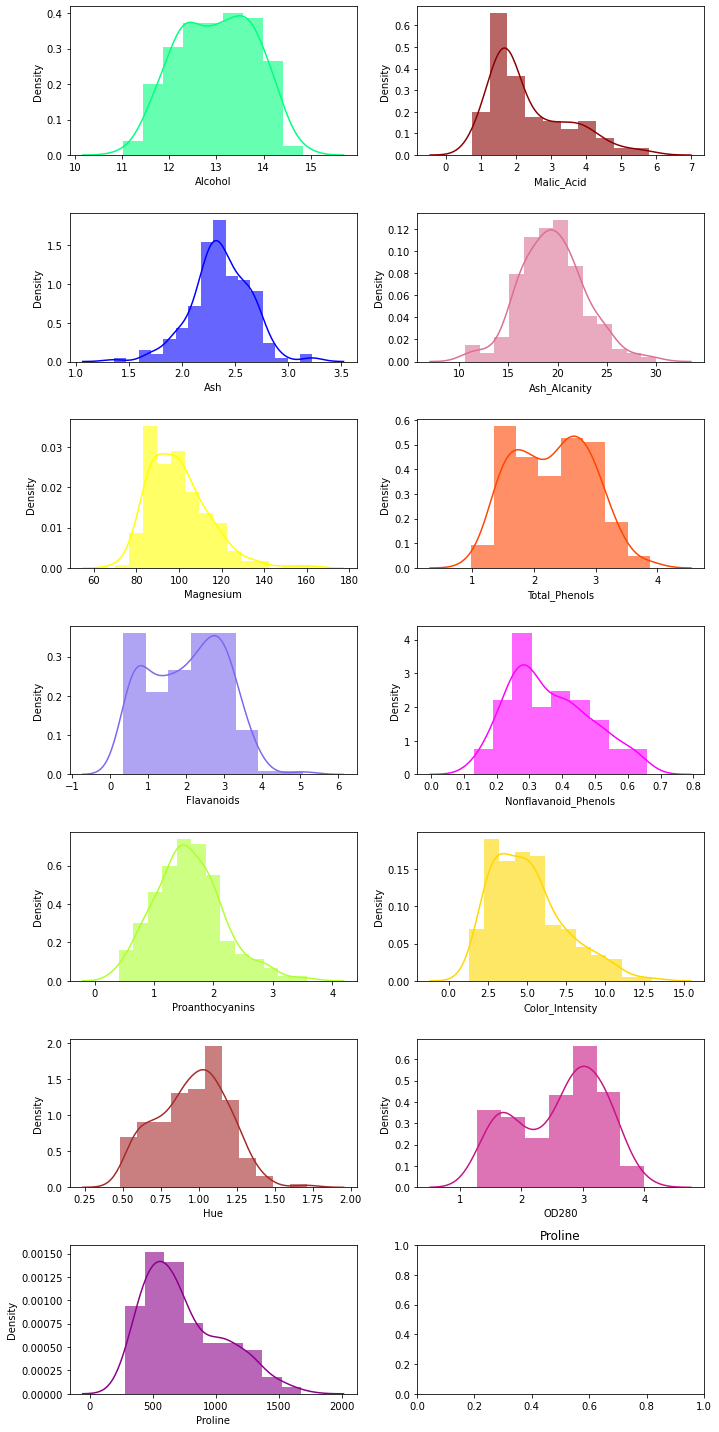

In [8]:
# previewing the histograms of each variable
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 20))

cols = df.columns.to_list()
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500', '#7B68EE', '#FF00FF',
          '#ADFF2F', '#FFD700', '#A52A2A', '#C71585', '#8B008B']

for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.distplot(df[col], ax = ax, color = color, hist_kws = dict(alpha = 0.6))
    plt.title(col)
    
plt.tight_layout()

C:\Users\Ramyasree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ramyasree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ramyasree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ramyasree\

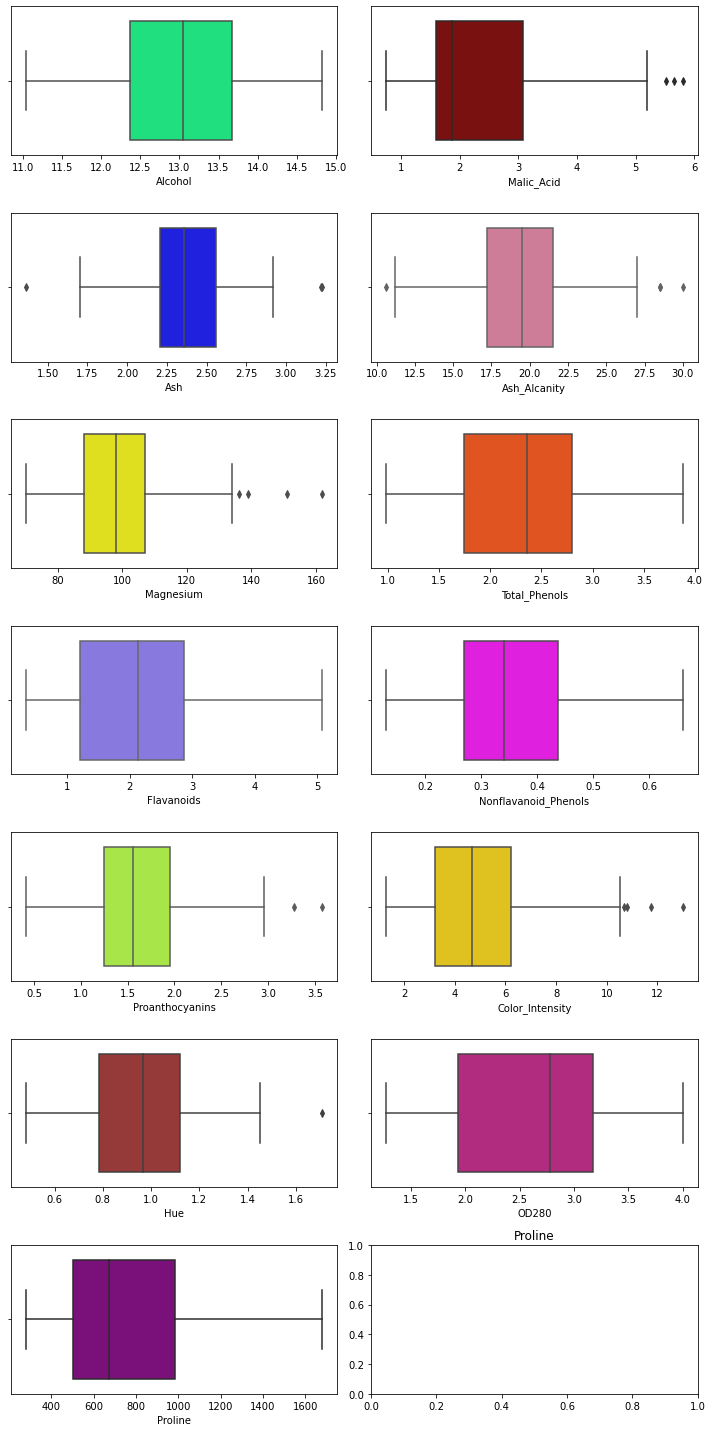

In [9]:
# previewing the boxplots of each variable
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 20))

cols = df.columns.to_list()
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500', '#7B68EE', '#FF00FF',
          '#ADFF2F', '#FFD700', '#A52A2A', '#C71585', '#8B008B']

for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.boxplot(df[col], ax = ax, color = color)
    plt.title(col)
    
plt.tight_layout()

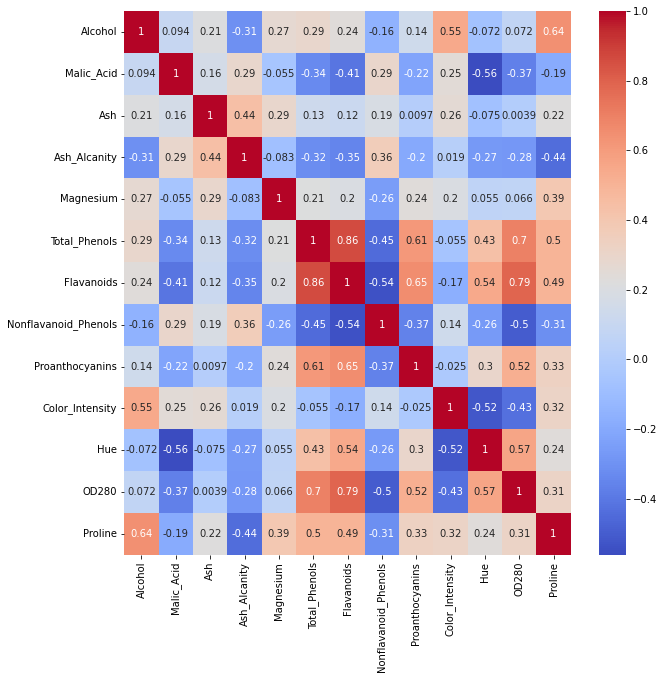

In [10]:
# previewing the correlations between the variables
corr = df.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

In [11]:
# set all the features into X
X = df.values
X.shape

(178, 13)

In [12]:
# scale our features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# fit and transform our features
X = sc.fit_transform(X)

In [13]:
# fitting KMeans with 5 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(5)
kmeans.fit(X)

# getting the cluster labels
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 4, 1, 1, 3, 3,
       1, 1, 4, 1, 4, 3, 3, 0, 1, 1, 1, 4, 1, 3, 1, 1, 3, 4, 3, 1, 3, 3,
       3, 3, 3, 3, 4, 1, 1, 0, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3,
       1, 1, 3, 3, 3, 3, 1, 3, 4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2])

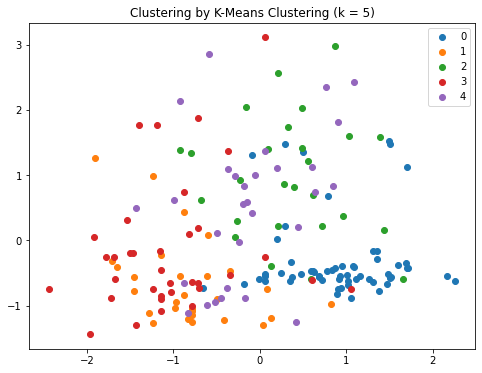

In [14]:
# getting the KMeans scatter plot
kmeans_pred = kmeans.labels_
kmeans_clust = np.unique(kmeans_pred)

plt.figure(figsize = (8, 6))
for cluster in kmeans_clust:
    row_ix = np.where(kmeans_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Clustering by K-Means Clustering (k = 5)")
plt.legend()
plt.show()

In [15]:
# getting the optimum value of k for our KMeans model using the Elbow Method
errors_list = []

# calculating the sum of errors for 1-10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    errors_list.append(kmeans.inertia_)

C:\Users\Ramyasree\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


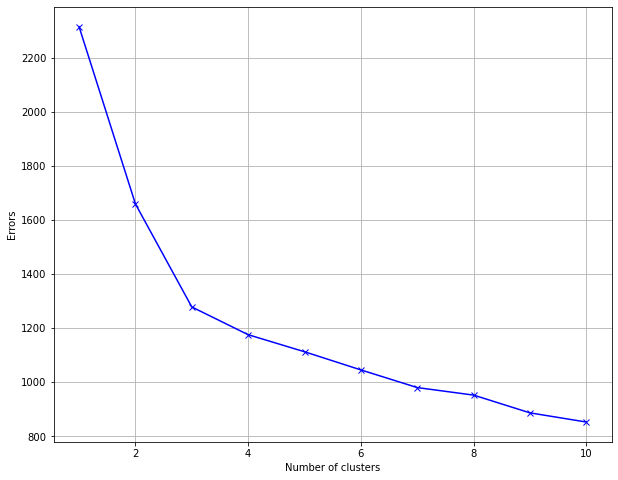

In [16]:
# visualizing the distribution of errors per number of clusters
plt.figure(figsize = (10, 8))
plt.plot(range(1, 11), errors_list, 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("Errors")
plt.grid(True)
plt.show()

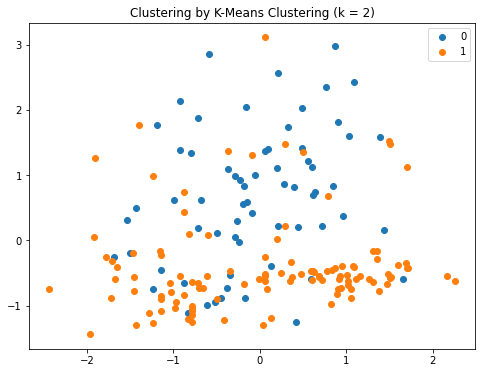

In [17]:
# setting k to 2 
k2 = KMeans(2)
k2.fit(X)

k2_labels = k2.labels_


# visualizing the improvement
k2_pred = k2_labels
k2_clust = np.unique(k2_pred)

plt.figure(figsize = (8, 6))
for cluster in k2_clust:
    row_ix = np.where(k2_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    

plt.title("Clustering by K-Means Clustering (k = 2)")
plt.legend()
plt.show()

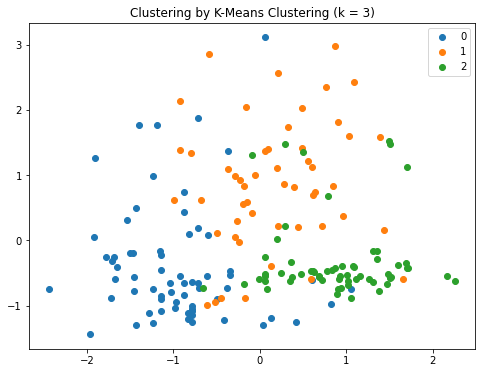

In [18]:
# setting k to 3 to improve the model
k3 = KMeans(3)
k3.fit(X)

k3_labels = k3.labels_


# visualizing the improvement
k3_pred = k3_labels
k3_clust = np.unique(k3_pred)

plt.figure(figsize = (8, 6))
for cluster in k3_clust:
    row_ix = np.where(k3_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    

plt.title("Clustering by K-Means Clustering (k = 3)")
plt.legend()
plt.show()

In [19]:
# add these cluster labels to our dataset
df['kmeans_cluster_group'] = k3_labels

# previewing a sample of our dataset
df.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster_group
79,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463,0
167,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685,1
138,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580,1
135,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695,1
98,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660,0
46,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065,2
31,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515,2
20,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780,2
101,12.60,1.34,1.90,18.5,88,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562,0
33,13.76,1.53,2.70,19.5,132,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235,2


In [20]:
# fitting agglomerative clustering with 5 clusters
from sklearn.cluster import AgglomerativeClustering as AC

agg = AC(n_clusters = 5)
agg.fit(X)

agg_labels = agg.labels_
agg_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 3, 0,
       0, 1, 2, 1, 2, 0, 3, 0, 1, 1, 1, 2, 1, 3, 1, 1, 3, 2, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 3, 2, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4,
       4, 4], dtype=int64)

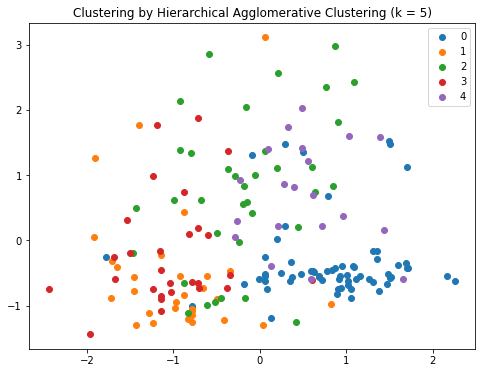

In [21]:
# Creating a scatter plot of the cluster analysis
agg_pred = agg_labels
agg_clust = np.unique(agg_pred)

plt.figure(figsize = (8, 6))
for cluster in agg_clust:
    row_ix = np.where(agg_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    

plt.title("Clustering by Hierarchical Agglomerative Clustering (k = 5)")
plt.legend()
plt.show()

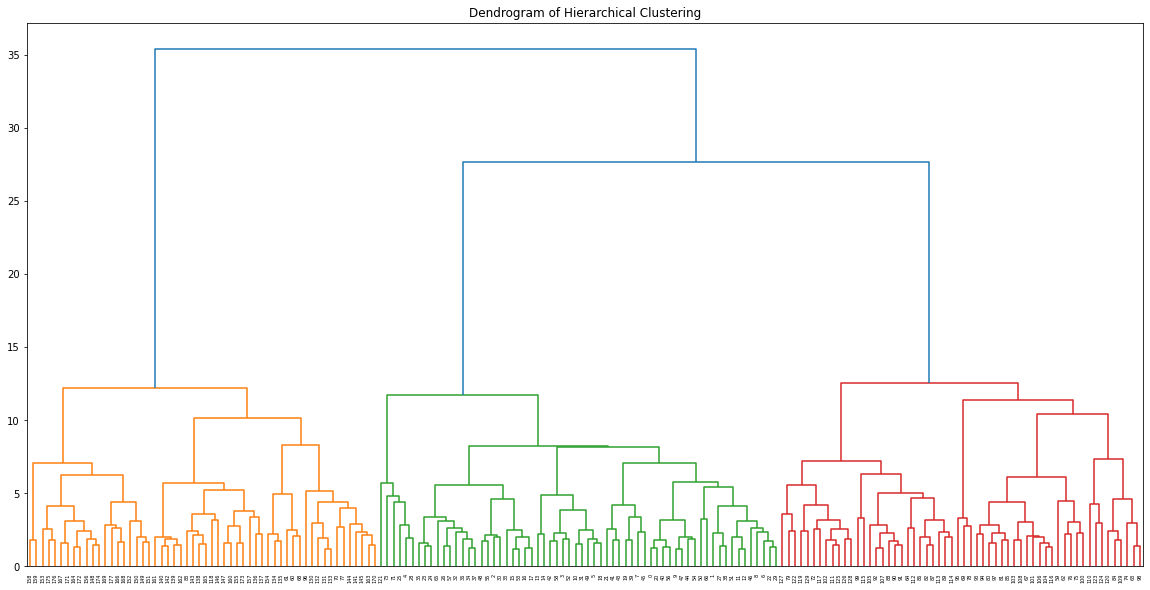

In [22]:
# creating a dendrogram of our agglomerative clustering analysis
from scipy.cluster import hierarchy

plt.figure(figsize = (20, 10))
hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))
plt.title("Dendrogram of Hierarchical Clustering")
plt.show()

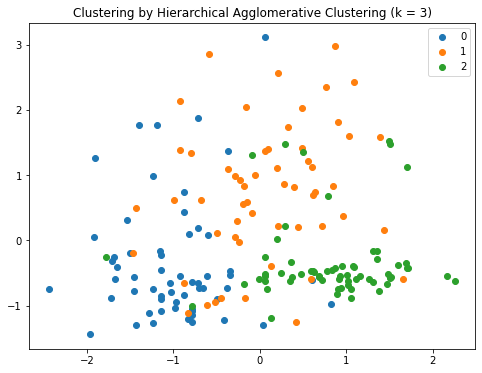

In [23]:
# agglomerative clustering with 3 clusters
agg3 = AC(n_clusters = 3)
agg3.fit(X)

agg3_labels = agg3.labels_
agg3_clust = np.unique(agg3_labels)

plt.figure(figsize = (8, 6))
for cluster in agg3_clust:
    row_ix = np.where(agg3_labels == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    

plt.title("Clustering by Hierarchical Agglomerative Clustering (k = 3)")
plt.legend()
plt.show()

In [24]:
# adding to our dataset
df['agglomerative_cluster_group'] = agg3_labels

# previewing a sample of our dataset
df.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster_group,agglomerative_cluster_group
153,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675,1,1
116,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495,0,0
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,2
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660,1,1
142,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520,1,1
119,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564,0,0
85,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450,0,0
106,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510,0,0
66,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502,0,2
128,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342,0,0


C:\Users\Ramyasree\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


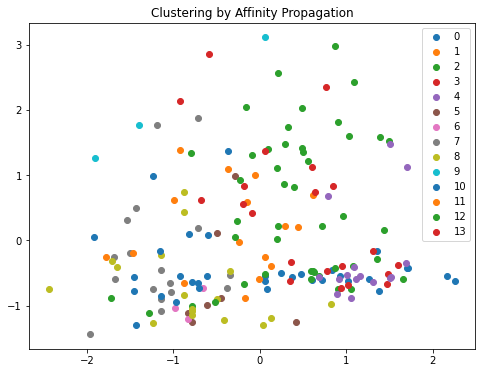

In [25]:
# Affinity Propagation
from sklearn.cluster import AffinityPropagation as AP

ap = AP()
ap.fit(X)

ap_pred = ap.predict(X)
clusters = np.unique(ap_pred)

plt.figure(figsize = (8, 6))
for cluster in clusters:
    row_ix = np.where(ap_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)

plt.title("Clustering by Affinity Propagation")
plt.legend()
plt.show()

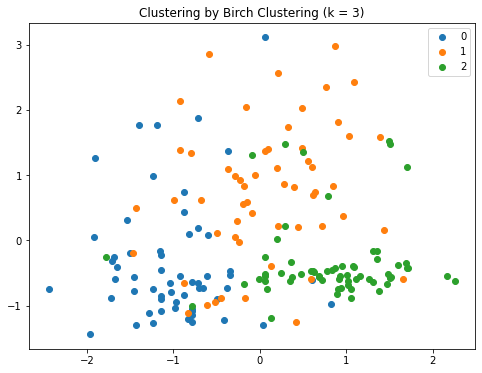

In [26]:
# Birch clustering
from sklearn.cluster import Birch

birch = Birch()
birch.fit(X)

birch_pred = birch.predict(X)
birch_clust = np.unique(birch_pred)

plt.figure(figsize = (8, 6))
for cluster in birch_clust:
    row_ix = np.where(birch_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)

plt.title("Clustering by Birch Clustering (k = 3)")
plt.legend()
plt.show()

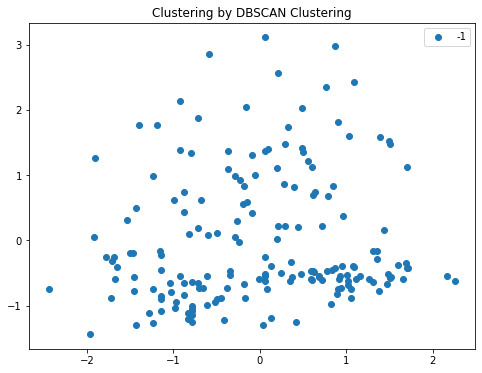

In [27]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.30, min_samples = 9)
dbscan.fit(X)

dbscan_pred = dbscan.labels_
dbscan_clust = np.unique(dbscan_pred)

plt.figure(figsize = (8, 6))
for cluster in dbscan_clust:
    row_ix = np.where(dbscan_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)

plt.title("Clustering by DBSCAN Clustering")
plt.legend()
plt.show()